In [154]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv("test_cnnoutputs.csv", header=0, usecols=range(14, 74))

In [156]:
df = df.dropna()

In [157]:
df.tail()

,Vab_sag,Vab_swell,Vab_inter,Vab_flicker,Vab_harmonic,Vab_osc,Vab_spike,Vab_sag_har,Vab_swell_har,Vab_swell_har.1,...,Ic_sag,Ic_swell,Ic_inter,Ic_flicker,Ic_harmonic,Ic_osc,Ic_spike,Ic_sag_har,Ic_swell_har,Ic_swell_har.1
5,0.193112,0.819386,0.784912,0.504543,0.778859,0.994593,0.164998,0.184883,0.814136,0.999492,...,0.523201,0.232851,0.152562,0.412789,0.814329,0.139373,0.314006,0.501081,0.916864,0.411957
6,0.619132,0.918436,0.369065,0.717533,0.744436,0.580275,0.342276,0.930750,0.259162,0.119664,...,0.806222,0.088167,0.007824,0.041256,0.623147,0.648486,0.573367,0.783915,0.780526,0.461891
7,0.285574,0.285574,0.285574,0.285574,0.285574,0.285574,0.285574,0.285574,0.285574,0.285574,...,0.285574,0.285574,0.285574,0.285574,0.285574,0.285574,0.285574,0.285574,0.285574,0.285574
8,0.041936,0.210883,0.617755,0.329911,0.587321,0.463464,0.091254,0.430756,0.978033,0.624801,...,0.869466,0.392412,0.012972,0.105307,0.606915,0.312567,0.582186,0.422668,0.478476,0.556751
9,0.328266,0.498390,0.442806,0.012537,0.885338,0.865225,0.222664,0.746566,0.337527,0.935646,...,0.890392,0.169598,0.112953,0.958417,0.713520,0.104862,0.250176,0.048226,0.353594,0.355572


In [158]:
# scaled_data = preprocessing.scale(df)

In [159]:
pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)
pca_data

array([[ 5.04133594e-01, -3.04718860e-01, -9.61149296e-01,
         1.38132808e+00,  2.64350605e-01, -8.20440027e-01,
        -4.01624235e-01, -3.29803563e-01, -1.58950562e-01,
         4.42788167e-16],
       [ 1.12059645e+00,  1.28768848e+00, -7.66008111e-01,
        -4.51135161e-01, -2.82211611e-01, -5.86202486e-02,
         1.05530643e+00, -2.00134244e-01,  1.45708614e-01,
         1.99493200e-17],
       [ 8.73534413e-01, -5.57996908e-01,  3.53840917e-01,
        -8.27612843e-01,  1.30813058e+00, -9.69584715e-02,
        -3.37376166e-01, -1.83614116e-01,  5.60535761e-01,
         4.45823933e-16],
       [-9.78236284e-01,  5.59541547e-01,  4.53870224e-01,
         3.47762149e-01, -6.78203868e-01, -3.45224394e-01,
        -3.09643041e-01,  2.27244813e-01,  1.03266407e+00,
         2.39391840e-16],
       [-1.49822693e+00,  1.16574506e+00, -1.79543250e-01,
        -2.05680331e-01,  5.21791127e-01,  5.63388157e-01,
        -5.13497158e-01, -5.45201872e-01, -4.19657525e-01,
         1.

In [160]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

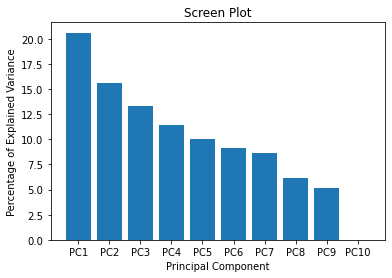

In [161]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Screen Plot')
plt.show()

In [162]:
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.504134,-0.304719,-0.961149,1.381328,0.264351,-0.820440,-0.401624,-0.329804,-0.158951,4.427882e-16
1,1.120596,1.287688,-0.766008,-0.451135,-0.282212,-0.058620,1.055306,-0.200134,0.145709,1.994932e-17
2,0.873534,-0.557997,0.353841,-0.827613,1.308131,-0.096958,-0.337376,-0.183614,0.560536,4.458239e-16
3,-0.978236,0.559542,0.453870,0.347762,-0.678204,-0.345224,-0.309643,0.227245,1.032664,2.393918e-16
4,-1.498227,1.165745,-0.179543,-0.205680,0.521791,0.563388,-0.513497,-0.545202,-0.419658,1.318390e-16
5,-0.545823,-0.543829,1.401319,0.120396,-0.076587,-0.594226,0.881234,-0.464228,-0.393376,3.243933e-16
6,1.564245,0.463044,1.005699,0.246460,-0.552760,0.506690,-0.730111,0.265883,-0.403073,3.599551e-16
7,-0.565660,0.053493,-0.287145,-0.348738,0.389047,-0.504404,0.126429,1.269174,-0.429599,1.955901e-16
8,-0.245836,-0.906770,-0.270037,0.761511,0.167543,1.352828,0.619608,0.232305,0.206067,3.391384e-16
9,-0.228728,-1.216198,-0.750846,-1.024290,-1.061100,-0.003033,-0.390326,-0.271625,-0.140321,4.387089e-16


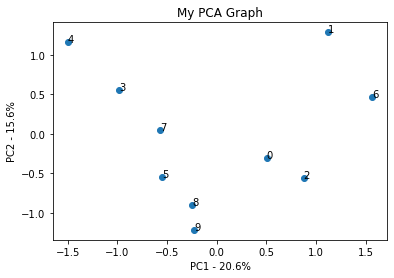

In [163]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
# plt.axis([0, 1, 0, 1])
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()